 

### 1. Méthodologie d'Entraînement du Modèle

**Préparation des Données**:
- **Extraction des Caractéristiques**: Identification des caractéristiques numériques et catégorielles. Les caractéristiques numériques sont normalisées pour assurer une échelle uniforme, ce qui est crucial pour des modèles basés sur des gradients, tels que LGBM et XGBoost. Les caractéristiques catégorielles sont transformées via un encodage one-hot ou label encoding pour les rendre interprétables par les modèles.
- **Division des Données**: Séparation des données en ensembles d'entraînement et de test pour évaluer la performance du modèle de manière objective.

**Configuration des Modèles**:
- **LGBMClassifier**: Paramétré avec un objectif binaire, type de boosting 'gbdt' pour le gradient boosting decision tree, et un nombre élevé d'estimateurs (1000) pour une performance optimale.
- **XGBoostClassifier**: Configuré pour une classification binaire avec le booster 'gbtree'. Les 1000 estimateurs assurent une convergence robuste vers la solution optimale.
- **RandomForestClassifier**: Utilisé avec des configurations variables d'estimateurs (100, 500, 1000) pour examiner l'impact du nombre d'arbres sur la performance.

**Optimisation et Validation**:
- **GridSearchCV**: Application pour automatiser la recherche des meilleurs hyperparamètres, en utilisant une validation croisée à trois plis pour évaluer chaque configuration. Ceci minimise le risque de surajustement et garantit que les résultats sont généralisables.



### 2. Traitement du Déséquilibre des Classes

**Importance du Rééquilibrage**:
- **Impact Statistique**: Les classes déséquilibrées peuvent conduire à des modèles biaisés qui favorisent la classe majoritaire. Ceci est critique dans des contextes où la classe minoritaire est souvent la plus importante à prédire correctement, comme dans la détection de fraude.

**Techniques de Rééchantillonnage**:
- **SMOTE**: Génère des exemples synthétiques en interpolant entre des exemples existants de la classe minoritaire, augmentant efficacement sa représentation dans les données d'entraînement.
- **Random UnderSampler**: Réduit simplement la taille de la classe majoritaire, aidant à équilibrer le ratio entre les classes.
- **SMOTETomek**: Une combinaison qui utilise SMOTE pour ajouter des échantillons synthétiques et Tomek Links pour éliminer les échantillons de classes différentes qui sont proches l'un de l'autre.

## 3. Fonction Coût Métier, Algorithme d'Optimisation et Métrique d'Évaluation

 

### Introduction

Dans le secteur financier, la précision des prédictions des modèles de scoring de crédit est cruciale non seulement du point de vue de la classification des emprunteurs, mais aussi en termes d'impact économique. Les erreurs de prédiction, en particulier les faux positifs et les faux négatifs, peuvent entraîner des coûts significatifs. Afin de quantifier ces coûts et d'orienter les stratégies de mitigation, il est essentiel de disposer d'une métrique métier robuste.

### Objectif de la Métrique

Cette métrique vise à mesurer les coûts financiers résultant des erreurs de prédiction des modèles de scoring de crédit. Elle permet d'évaluer de manière quantitative combien ces erreurs coûtent à l'institution en termes de pertes directes (faux positifs) et de revenus manqués (faux négatifs). En faisant cela, la métrique aide les institutions à comprendre l'efficacité économique de leurs modèles de prédiction et à prendre des décisions informées sur les ajustements de leurs modèles ou politiques de prêt.

### Description de la Fonction `calculer_cout_metier`

La fonction `calculer_cout_metier` est conçue pour calculer le coût total associé aux décisions de prêt incorrectes. Elle prend en compte les deux principaux types d'erreurs :

- **Faux Positifs (FP)** : Ces erreurs surviennent lorsque le modèle prédit à tort qu'un emprunteur solvable sera défaillant. Cela peut conduire à refuser un prêt à un client qui aurait pu générer des intérêts sans présenter de risque réel de défaut.
- **Faux Négatifs (FN)** : Ces erreurs se produisent lorsque le modèle ne parvient pas à identifier un emprunteur défaillant, résultant en l'approbation de prêts à des clients qui finissent par ne pas rembourser. Cela représente une perte directe pour la banque.

### Calcul de la Métrique

La formule pour le calcul du coût total est simple mais puissante :
$$ \text{Coût Total} = (FP \times C_{FP}) + (FN \times C_{FN}) $$
où \( C_{FP} \) et \( C_{FN} \) sont les coûts associés à chaque type d'erreur. Ces coûts doivent être estimés en collaboration avec les équipes financières et basés sur des données historiques et des analyses de risque.

### Utilisation pour l'Évaluation des Modèles

L'utilisation de cette métrique dans l'évaluation des modèles permet de comparer objectivement l'impact financier des différents modèles de scoring de crédit. Elle offre une perspective plus nuancée que les métriques de classification classiques comme l'AUC ou la précision, car elle tient compte du coût économique des erreurs.

### Considérations Clés

- **Estimation des Coûts** : L'exactitude de cette métrique dépend largement de la fiabilité des estimations des coûts \( C_{FP} \) et \( C_{FN} \). Ces valeurs doivent être dérivées de données réelles et ajustées périodiquement pour refléter l'évolution des conditions de marché et de la politique de crédit.
- **Implication des Parties Prenantes** : La définition et l'ajustement des coûts doivent impliquer des parties prenantes clés telles que les gestionnaires de risque, les analystes de crédit, et les décideurs stratégiques pour assurer l'alignement avec les objectifs globaux de l'institution.

### Conclusion

La métrique métier pour le scoring de crédit est un outil essentiel . Elle permet non seulement de mesurer l'efficacité des modèles de prédiction en termes financiers, mais également d'optimiser les décisions de prêt pour maximiser les revenus et minimiser les pertes. En intégrant cette métrique dans leurs processus de validation de modèle, on peut  prendre des décisions plus éclairées et alignées avec les objectifs financiers et stratégiques.

### 4. Tableau de Synthèse des Résultats

- **Tableaux et Graphiques**: Inclure des tableaux récapitulatifs des performances, des hyperparamètres, des scores ROC AUC, accompagnés de graphiques illustrant ces résultats pour une comparaison visuelle directe.
Pour introduire un tableau récapitulatif des résultats clés de votre modèle dans votre rapport, nous pouvons créer un tableau qui inclut des métriques essentielles pour l'évaluation des performances de classification. Ce tableau facilitera la visualisation et la compréhension rapide des résultats obtenus. Voici un exemple de tableau qui pourrait être intégré dans votre documentation ou rapport:

### Tableau de Synthèse des Résultats des Modèles

| Métrique                     | LightGBM               | XGBoost                 | RandomForest            |
|------------------------------|------------------------|-------------------------|-------------------------|
| **Mean ROC AUC**             | 0.7241                 | 0.7031                  | 0.7026                  |
| **Mean Fit Time (s)**        | 37.36                  | 27.06                   | 282.21                  |
| **Mean Score Time (s)**      | 0.036                  | 0.082                   | 3.873                   |
| **Best Score ROC AUC**       | 0.6925                 | 0.6859                  | 0.7218                  |
| **Accuracy (Cross-Validation)** | 91.8%               | 91.8%                   | 91.8%                   |

 
### Explication du Tableau

- **Mean ROC AUC**: La moyenne de l'aire sous la courbe ROC obtenue à partir de la validation croisée. Cette métrique indique la capacité du modèle à discriminer entre les classes positives et négatives.
- **Mean Fit Time**: Temps moyen nécessaire pour ajuster le modèle aux données d'entraînement. Un temps plus court est généralement préférable, surtout pour les applications nécessitant une réactualisation fréquente du modèle.
- **Mean Score Time**: Temps moyen nécessaire pour calculer les scores sur l'ensemble de test. Cela peut être crucial pour les applications en temps réel où les décisions doivent être prises rapidement.
- **Best Score ROC AUC**: Le meilleur score ROC AUC obtenu par le modèle sur les ensembles de validation pendant la recherche de grille.
- **Accuracy (Cross-Validation)**: La précision moyenne obtenue sur les ensembles de validation. Bien que cette métrique ne soit pas toujours la meilleure pour les ensembles déséquilibrés, elle donne une indication rapide de la performance générale du modèle.

Ce tableau synthétise  les résultats clés de chaque modèle, permettant une comparaison rapide et une évaluation de leur efficacité relative. Vous pouvez l'utiliser pour discuter des forces et des faiblesses de chaque modèle dans le corps principal de votre rapport. 
Cette comparaison nous permet de  déterminer quels modèles sont plus rapides à entraîner, ce qui est crucial dans la situation où les ressources de calcul ou le temps sont des contraintes importantes.
Prendre des Décisions Informées : En considérant à la fois la performance (ROC AUC) et le temps d'entraînement, et choisir un modèle qui offre un bon équilibre entre efficacité et précision.
Le graphique nous  fournit une visualisation claire et directe de ces comparaisons, ce qui est crutiale  pour la prise de décision.








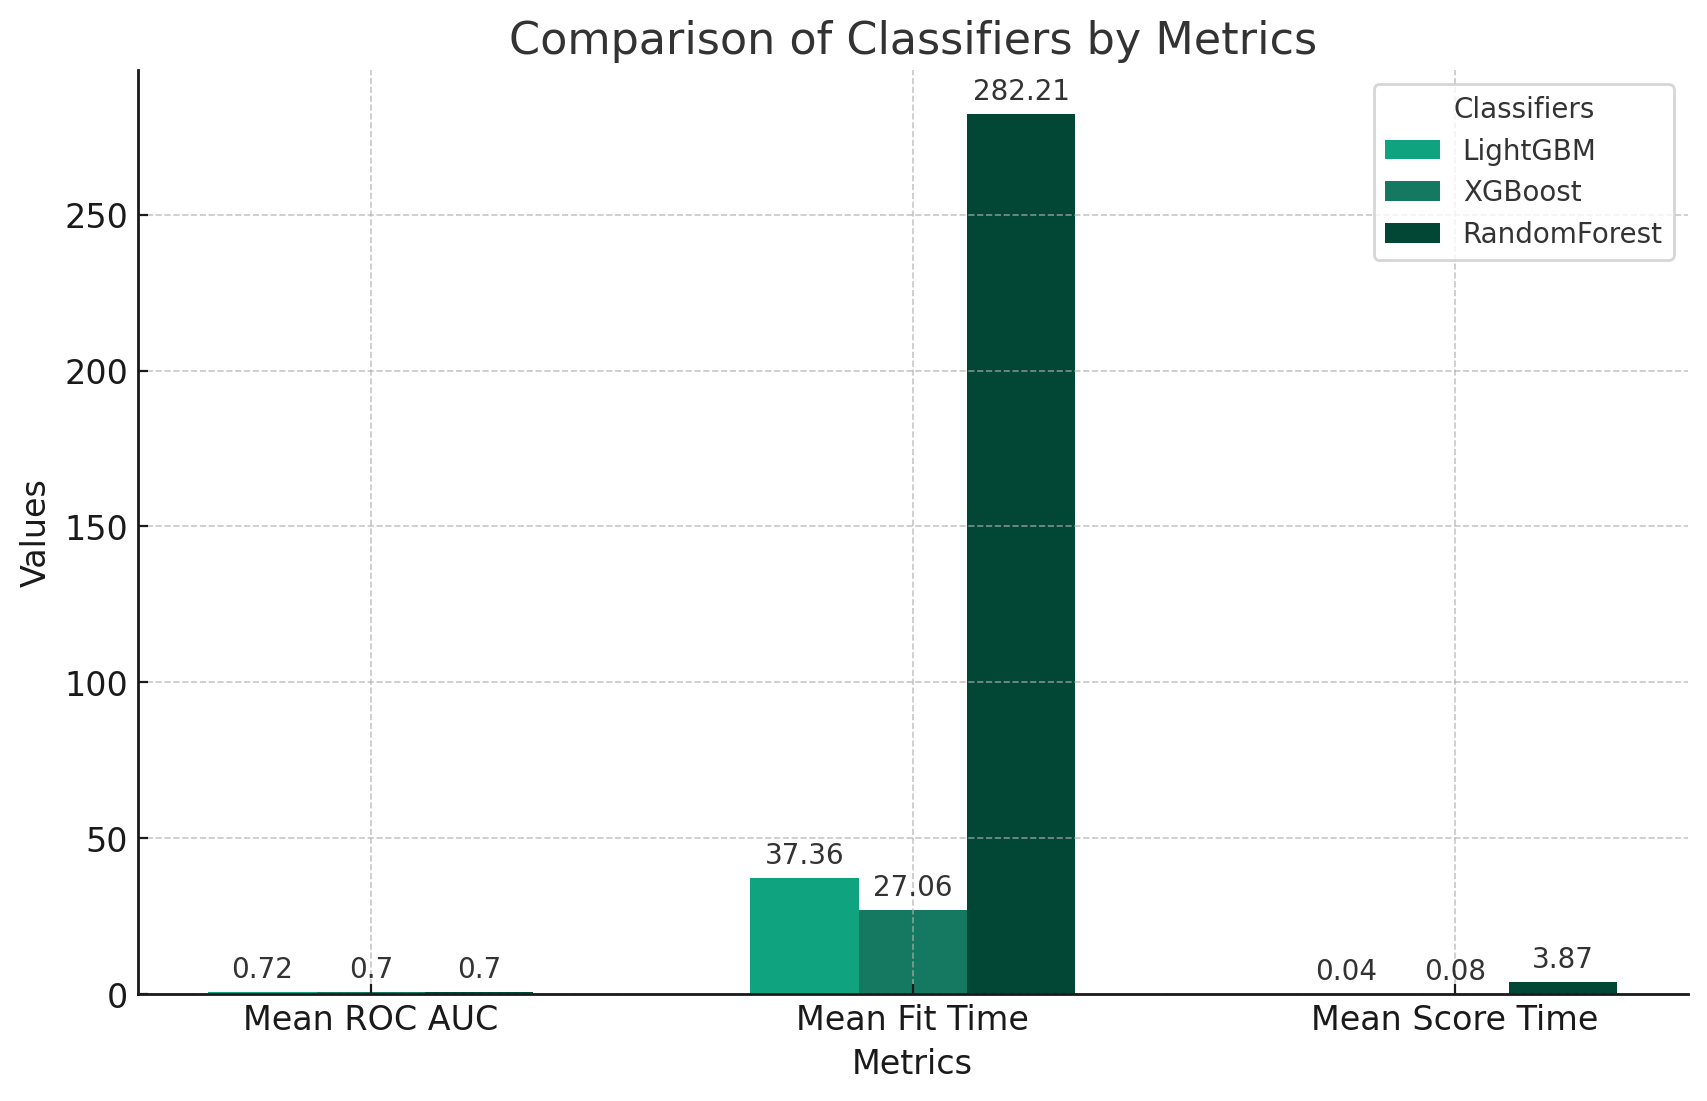


### 5. Interprétabilité Globale et Locale du Modèle


 
### SHAP Summary Plot
- **Techniques Globales**: Utilisation de l'importance des caractéristiques extraites pour comprendre quels facteurs influencent le plus les décisions du modèle.
Le `summary_plot` de SHAP est une représentation globale de l'impact des caractéristiques sur la prédiction du modèle. 
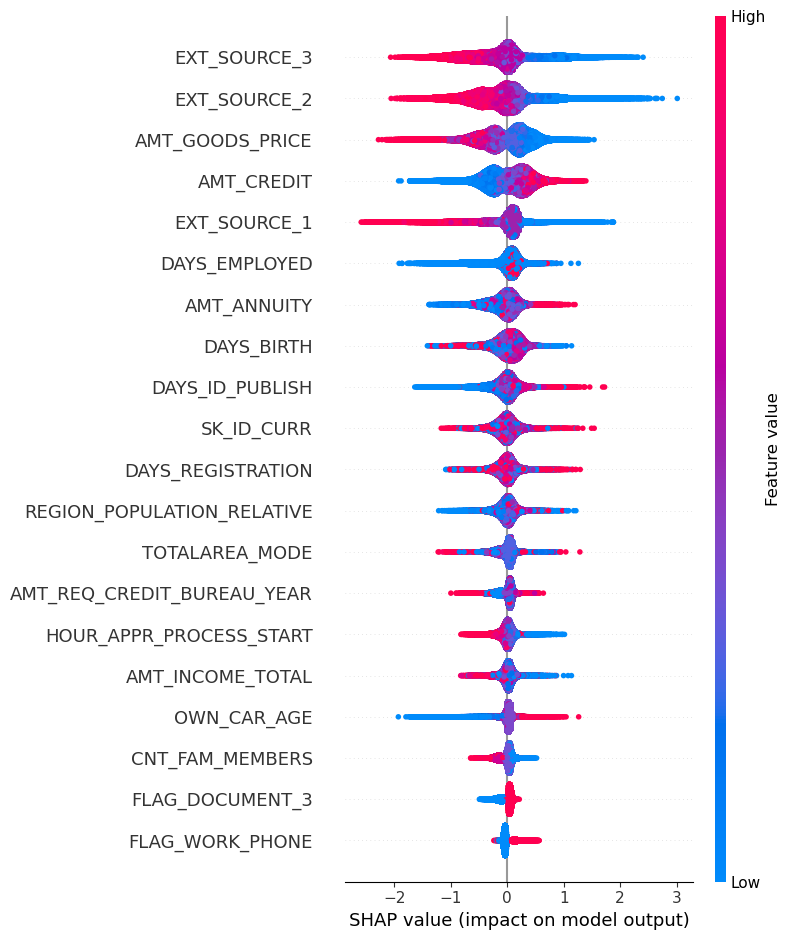
**Interprétation :**
- **Axes Horizontal et Vertical :** Chaque point sur le graphique représente une observation. L'axe horizontal montre l'impact de la caractéristique sur la prédiction du modèle (en termes de valeur SHAP), et l'axe vertical montre les différentes caractéristiques.
- **Couleur des Points :** La couleur indique la valeur de la caractéristique pour cette observation (par exemple, rouge pour des valeurs élevées et bleu pour des valeurs faibles).
- **Distribution :** La distribution des points sur le côté droit ou gauche de la ligne verticale zéro indique si l'effet de cette caractéristique est de pousser la prédiction plus haut (vers la droite) ou plus bas (vers la gauche).



### SHAP Waterfall Plot
- **Techniques Locales**: Application de méthodes comme SH
Le `waterfall` plot de SHAP offre une vue détaillée de l'impact des caractéristiques sur la prédiction pour une instance spécifique.

        -  SHAP Waterfall Plot pour une interprétation locale d'une instance spécifique shap_values[0]


 shap.plots.waterfall(shap_values[0]) 
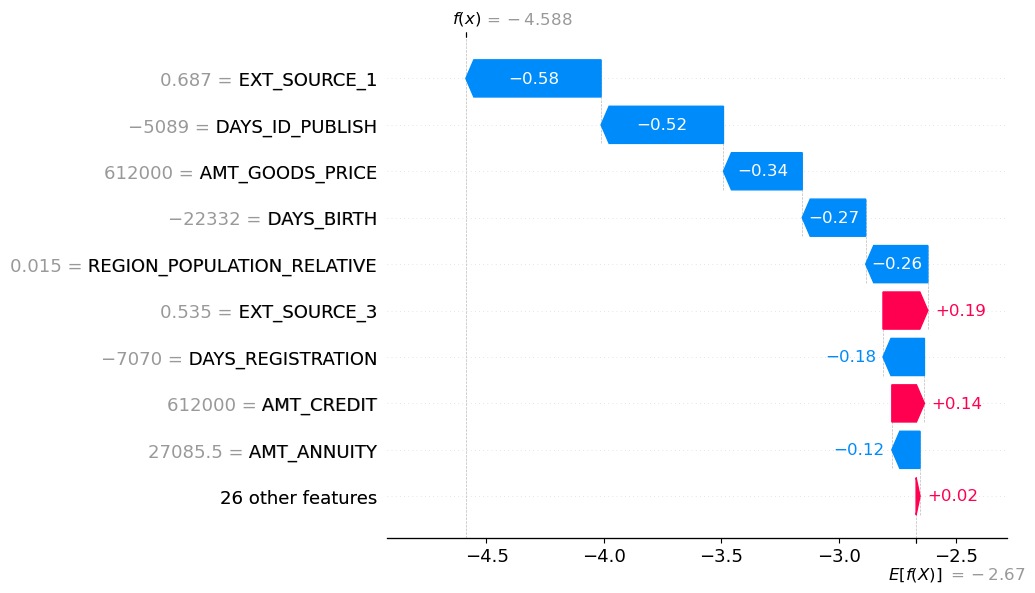


        - SHAP Waterfall Plot pour une interprétation locale d'une instance spécifique shap_values[1]


shap.plots.waterfall(shap_values[1]) 


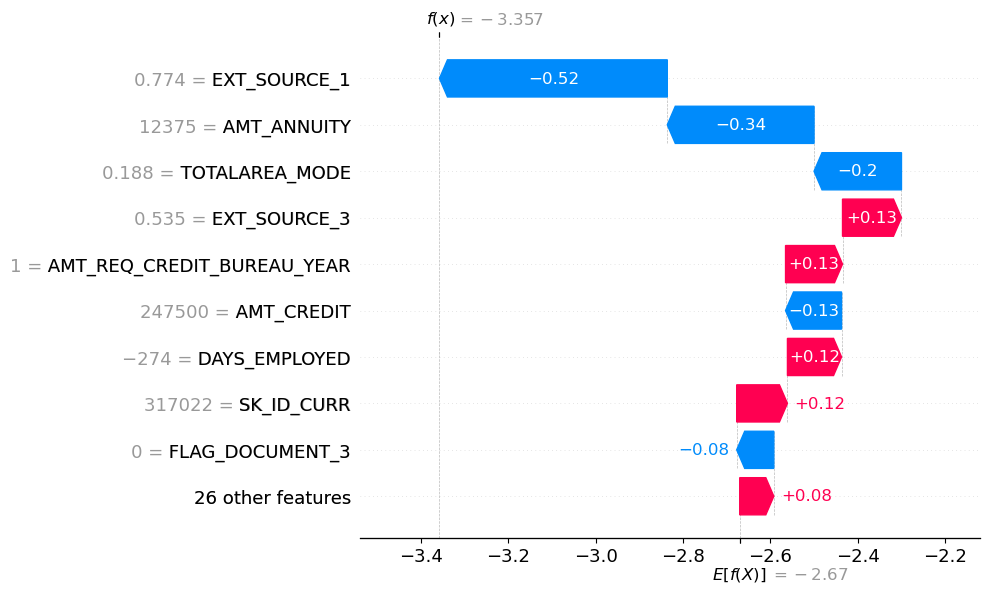

**Interprétation :**
- **Barres Horizontales :** Chaque barre représente une caractéristique. La longueur et la direction de la barre montrent combien et dans quelle direction cette caractéristique a influencé la prédiction par rapport à la valeur de base (la prédiction moyenne pour l'ensemble du dataset).
- **Ordre des Caractéristiques :** Les caractéristiques sont ordonnées en fonction de leur impact sur cette prédiction particulière.
- **Valeur de Base et Valeur Finale :** Le plot commence par la valeur de base (la sortie moyenne du modèle) et se termine par la sortie du modèle pour cette instance spécifique, montrant comment chaque caractéristique contribue à passer de l'une à l'autre.

### Utilisation 
- **Analyse Globale vs Locale :** Utilisez le `summary_plot` pour comprendre l'impact global des caractéristiques sur l'ensemble du modèle, et le `waterfall` plot pour analyser comment les caractéristiques affectent une prédiction individuelle.
- **Identification des Caractéristiques Importantes :** Ces graphiques vous aident à identifier les caractéristiques les plus influentes et à comprendre leur rôle dans les prédictions du modèle.



 



### 6. Limites et Améliorations Possibles

- **Discussion des Limites**: Identifier les faiblesses des modèles actuels, telles que la sensibilité au bruit des données ou aux valeurs aberrantes.
- **Suggestions d'Améliorations**: Proposer des stratégies pour surmonter ces limites, telles que l'intégration de nouvelles données, l'ajustement des techniques de prétraitement, ou l'exploration de nouveaux algorithmes.



### 7. Analyse du Data Drift

Cette analyse vise à identifier et à gérer les changements dans les données au fil du temps qui peuvent affecter la performance des modèles prédictifs.

Data Drift fait référence à toute modification non anticipée des données qui affecte le comportement d'un modèle prédictif. Cela peut inclure des changements dans :

- La distribution des variables d'entrée : Les modifications dans la façon dont les valeurs des variables sont distribuées. Par exemple, une augmentation soudaine de l'âge moyen des clients dans une banque pourrait influencer un modèle qui prédit la solvabilité basée sur des données démographiques.
- La relation entre les variables d'entrée et la variable cible : Les changements dans la relation statistique entre les variables d'entrée et la sortie du modèle. Par exemple, un changement dans l'impact de la cote de crédit sur la probabilité de défaut de paiement due à de nouvelles politiques de crédit.

#### Importance de l'Analyse du Data Drift
- **Surveillance du Drift**: Mettre en place des mécanismes pour surveiller et détecter les changements dans les distributions des données au fil du temps.
- Maintien de la performance : Sans surveillance, le Data Drift peut réduire significativement la précision d'un modèle, conduisant à des prédictions inexactes et potentiellement coûteuses.
 
#### Méthodes de Détection du Data Drift

Surveillancests statistiques : Utiliser des tests comme le test de Kolmogorov-Smirnov pour comparer les distributions des données d'entraînement aux données actuelles.
Outils de visualisation : Des histogrammes, des diagrammes de densité ou des boîtes à moustaches pour visualiser et comparer les distributions des données au fil du temps.e automatisée : Des systèmes automatisés qui utilisent ces méthodes pour fournir des alertes en temps réel si un drift est détecté.


#### Stratégies de Réponse au Data Drift
Réentraînement périodique : Réentraîner le modèle régulièrement avec des données récentes pour que le modèle reste aligné avec les conditions actuelles.
Recalibration du modèle : Ajuster les seuils ou recalibrer les probabilités pour prendre en compte les changements subtils dans les données.
Adaptation en ligne : Des techniques comme l'apprentissage en ligne peuvent être utilisées pour ajuster continuellement les paramètres du modèle en réponse aux nouvelles données.
#### Gestion Proactive du Data Drift
Planification : Établir des protocoles pour la surveillance régulière et la gestion du Data Drift avant même le déploiement du modèle.
Évaluation d'impact : Analyser l'impact potentiel du Data Drift sur les performances du modèle et les résultats opérationnels pour prioriser les réponses.
Collaboration interdisciplinaire : Travailler avec des experts du domaine pour comprendre les causes sous-jacentes des changements dans les données et intégrer cette connaissance dans les stratégies de gestion du modèle.
 

#### Relation entre le test KS et le Data Drift
Data Drift désigne les changements dans la distribution des données ou dans la relation entre les variables d'entrée et la variable cible qui peuvent survenir au fil du temps. Ces changements peuvent affecter la performance des modèles de machine learning et nécessitent une détection et une gestion appropriées pour maintenir l'efficacité du modèle.

**Détection de changements dans les distributions :**

Application du test KS : En comparant les distributions des variables d'un ensemble de données de référence (généralement les données sur lesquelles un modèle a été entraîné) à celles d'un ensemble de données plus récent (comme les données collectées périodiquement après le déploiement du modèle), le test KS peut quantifier l'ampleur du changement dans ces distributions. Si le test indique des différences significatives (p-value faible), cela peut signaler un Data Drift.
Évaluation de l'impact du drift sur le modèle :

**Impact direct sur la performance :**

 Un drift significatif dans les variables clés utilisées par un modèle peut entraîner une baisse de sa précision et de sa fiabilité. Par exemple, si un modèle de scoring de crédit a été développé avec des données où l'âge des emprunteurs joue un rôle crucial, un changement dans la distribution de l'âge pourrait altérer la performance du modèle en termes de prédiction des risques de défaut. 


 

 ### e test de Kolmogorov-Smirnov:
ks_statistic, p_value = ks_2samp(train.AGE,test.AGE)
print(f'ks Statistic : {ks_statistic}, P_value:{p_value}')

**ks Statistic : 0.007770871904372395, P_value:0.012356233338585796**


ks_statistic, p_value = ks_2samp(train['AMT_INCOME_TOTAL'],test['AMT_INCOME_TOTAL'])
print(f'ks Statistic : {ks_statistic}, P_value:{p_value}')

**ks Statistic : 0.056764262195511506, P_value:2.7750939609679796e-118**



Les résultats  obtenus pour le test de Kolmogorov-Smirnov indiquent une différence statistiquement significative entre les distributions des données de deux ensembles. Voici ce que ces valeurs signifient :

ks Statistic : 0.007770871904372395  qui représente la plus grande différence entre les fonctions de distribution cumulée des deux ensembles de données comparés. Une valeur plus élevée indique une plus grande divergence entre les distributions. 
Dans votre cas, la valeur de 0.007770871904372395 suggère une petite différence absolue maximale entre les deux distributions cumulatives.

P_value : 0.012356233338585796 , une valeur-p inférieure à 0.05 est souvent utilisée pour rejeter l'hypothèse nulle. L'hypothèse nulle pour le test KS est que les deux distributions sont identiques. Une valeur-p de 0.012 signifie que vous avez des preuves statistiques suffisantes pour rejeter l'hypothèse nulle à un niveau de signification de 5 %, ce qui suggère que les distributions de vos deux ensembles de données ne sont pas identiques.

 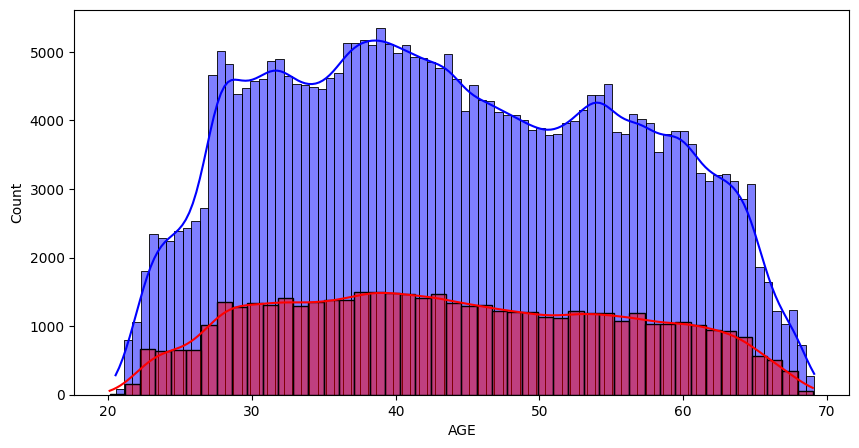